# Introduction
Provides a walk-through of the methods used to analyze the dataset originally provided by Dean De Cock. The link to the Kaggle competition can be found [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). XGBoost was the algorithm used to predict sale prices, given a number of records and their features.

## Goal
Predict the sales price of houses given the data.

## Acknowledgements
Thanks to:
> [juliencs for his techniques on cleaning housing data](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset)

> [Serigne's cleaning & regression](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard), especially his methods on handling NA data!

# 1. Data Exploration

## Import libraries

In [58]:
# Math & data
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Stats
from scipy.stats import skew

# Data processing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import accuracy_score

# sets max number of rows and columns to display
# https://www.youtube.com/watch?v=uIcime2nBjs
#pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 400)

## Load training and testing datasets

In [40]:
filepath = ''
train = pd.read_csv(filepath + 'train.csv')
test = pd.read_csv(filepath + 'test.csv')

print(f'Shape of training data: {train.shape}')
train.head()

Shape of training data: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [41]:
print(f'Shape of testing dat: {test.shape}')
test.head()

Shape of testing dat: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Investigating sale price
[Inspiration](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)

Summary stats for sale price:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.883
Kurtosis: 6.536


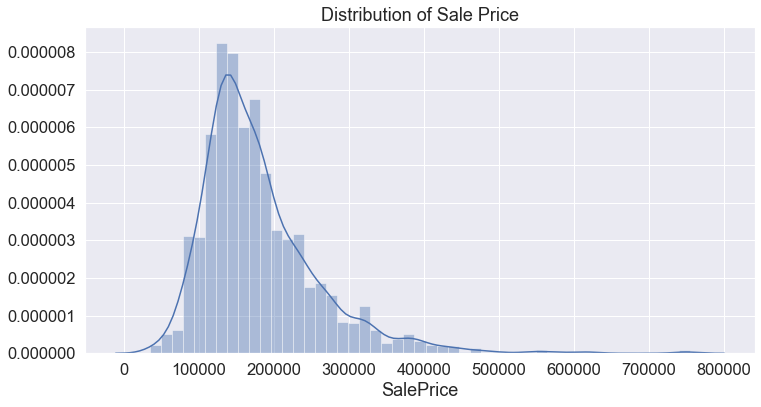

In [42]:
print( f"Summary stats for sale price:\n{ train['SalePrice'].describe() }\n" )
print( f"Skewness: { round(train['SalePrice'].skew(), 3) }" )
print( f"Kurtosis: { round(train['SalePrice'].kurt(), 3) }" )

fig, ax = plt.subplots(1,1, figsize=(12,6))
sns.distplot(train['SalePrice'], ax=ax)
ax.set_title('Distribution of Sale Price');

## Finding correlated values using heatmaps
Helps determine which features to use in the model.

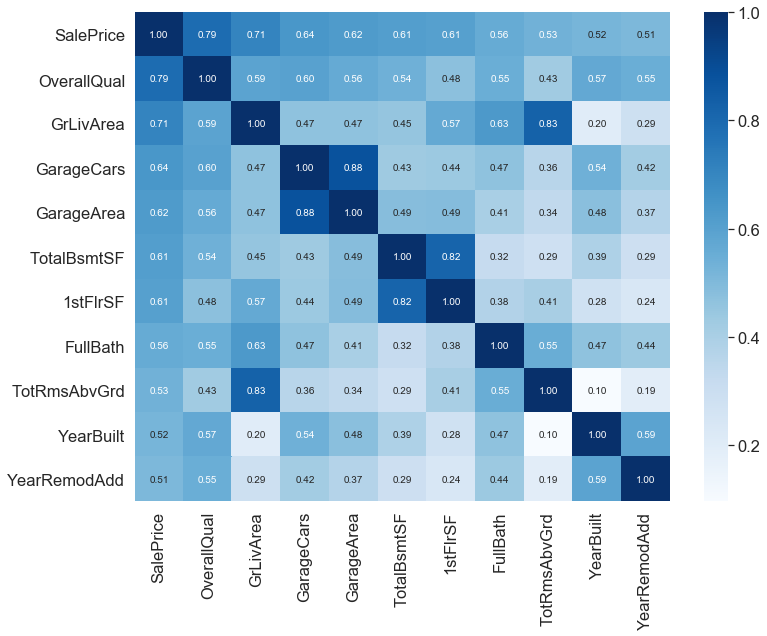

In [43]:
# Creating a SalePrice correlation matrix with the top 10 most correlated values
corrmat = train.corr()

k = 11   # num variables to use in heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index   # top 10 most correlated values

cm = np.corrcoef(train[cols].values.T)

fig, ax = plt.subplots(figsize=(12,9))
ax = sns.heatmap(cm, cmap='Blues', cbar=True, annot=True, fmt='0.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
ax.set_ylim(11, 0)
sns.set(font_scale=1.5)

    This lists the top 10 highest correlated values with regards to the target variable, SalePrice:
    
    1. OverallQual: Overall material and finish quality (ints)
    2. GrLivArea: Above grade (ground) living area square feet (ints)
    3. GarageCars: Size of garage in car capacity (ints)
    4. GarageArea: Size of garage in square feet (ints)
    5. TotalBsmtSF: Total square feet of basement area (ints)
    6. 1stFlrSF: First Floor square feet (ints)
    7. FullBath: Full bathrooms above grade (ints)
    8. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) (ints)
    9. YearBuilt: Original construction date (ints... but should be converted to a better representation for the model)
    10. YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
    
    These features would be good to use in the model. Let's come back to this after engineering the features. Perhaps there are potential features that are also highly correlated with the sale price.
   
## Plot the sale price as a function of each feature
[Thanks to Rutger Kassies](https://stackoverflow.com/questions/17210646/python-subplot-within-a-loop-first-panel-appears-in-wrong-position) for help in using for loops to plot a bunch of subplots.

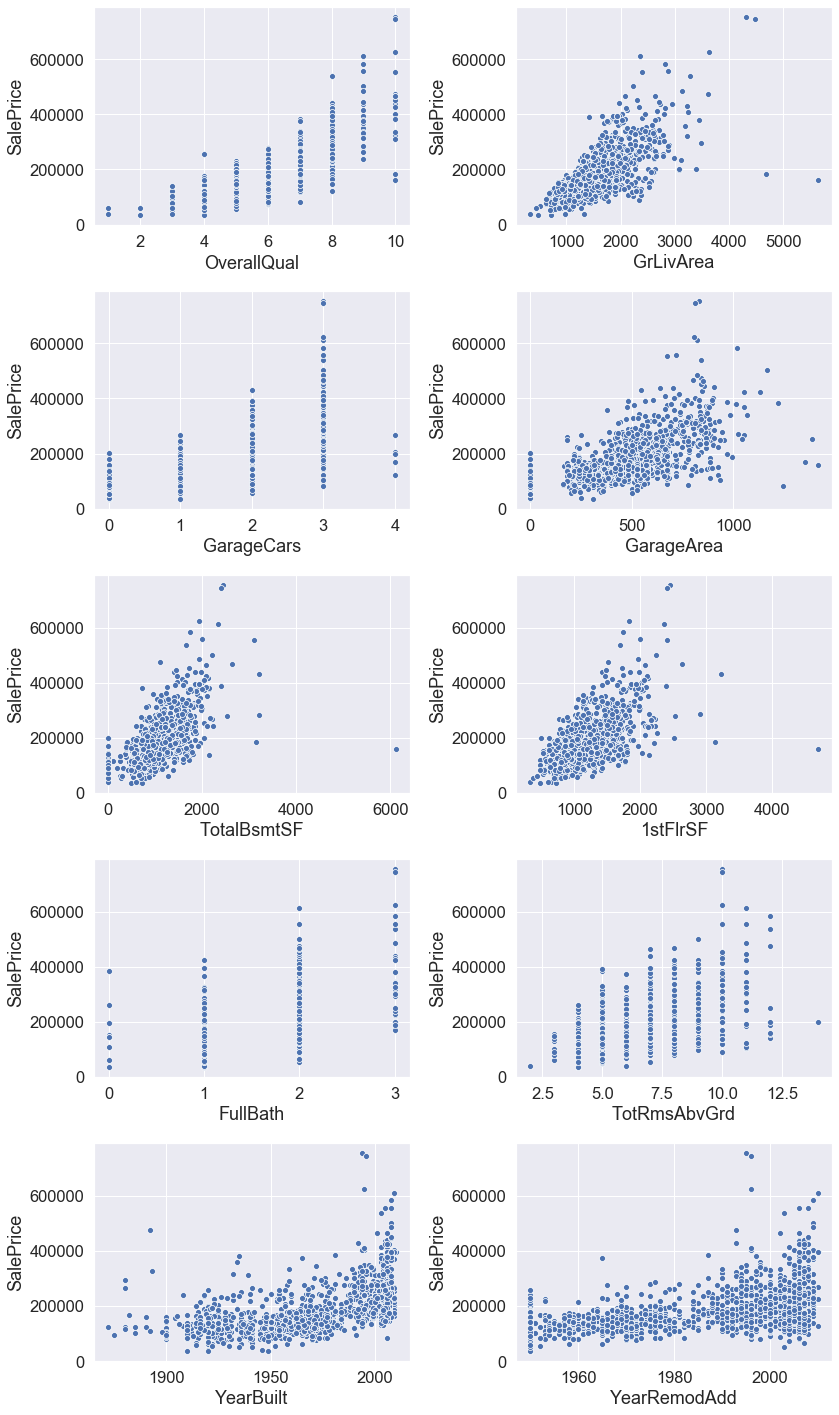

In [45]:
fig, ax = plt.subplots(5,2, figsize=(12,20))

# Flatten ax from (5,2) to (10,0)
ax = ax.ravel()

# Plot each feature (names found in cols[1:])
for i in range(10):
    sns.scatterplot(train[cols[i+1]], train['SalePrice'], ax=ax[i])
    
plt.tight_layout()

    There are large outliers seen in the GrLivArea, which is the area of the house. There are a couple points with values around 4800 and 5800 square ft respectively that have really low sale prices. There is another outlier in the TotalBsmtSF feature (total area of basement in square ft) with a value of 6100 that also has a relatively low sale price.
    
> [The author of the dataset, Dean De Cock, recommends "removing any houses with more than 4000 square feet from the data set"](http://jse.amstat.org/v19n3/decock.pdf)
    
    Removal of these records will help make the regression model perform better.

## Visualizing skewed features

Skew of GrLivArea: 1.3665603560164552


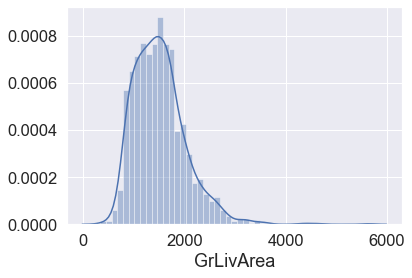

In [49]:
sns.distplot(train['GrLivArea']);
print(f"Skew of GrLivArea: {train['GrLivArea'].skew()}")

In [57]:
# Get only numeric variables. Object variables are categorical
numeric_feats_train = train.dtypes[ train.dtypes!='object' ].index

# List skewed features in the training set
skewed_train = train[numeric_feats_train].apply( lambda x: skew(x.dropna()) ).sort_values(ascending=False)
skewed_train = pd.DataFrame(skewed_train, columns=['Skew'])
skewed_train

,Skew
MiscVal,24.451640
PoolArea,14.813135
LotArea,12.195142
3SsnPorch,10.293752
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
ScreenPorch,4.117977
BsmtHalfBath,4.099186
EnclosedPorch,3.086696


# 2. Data Cleaning
## Remove the outliers

In [7]:
ind_outliers = train['GrLivArea'].sort_values(ascending=False)[:2].index
train = train.drop(labels=ind_outliers, axis=0)

## Replot the sale price as a function of each feature

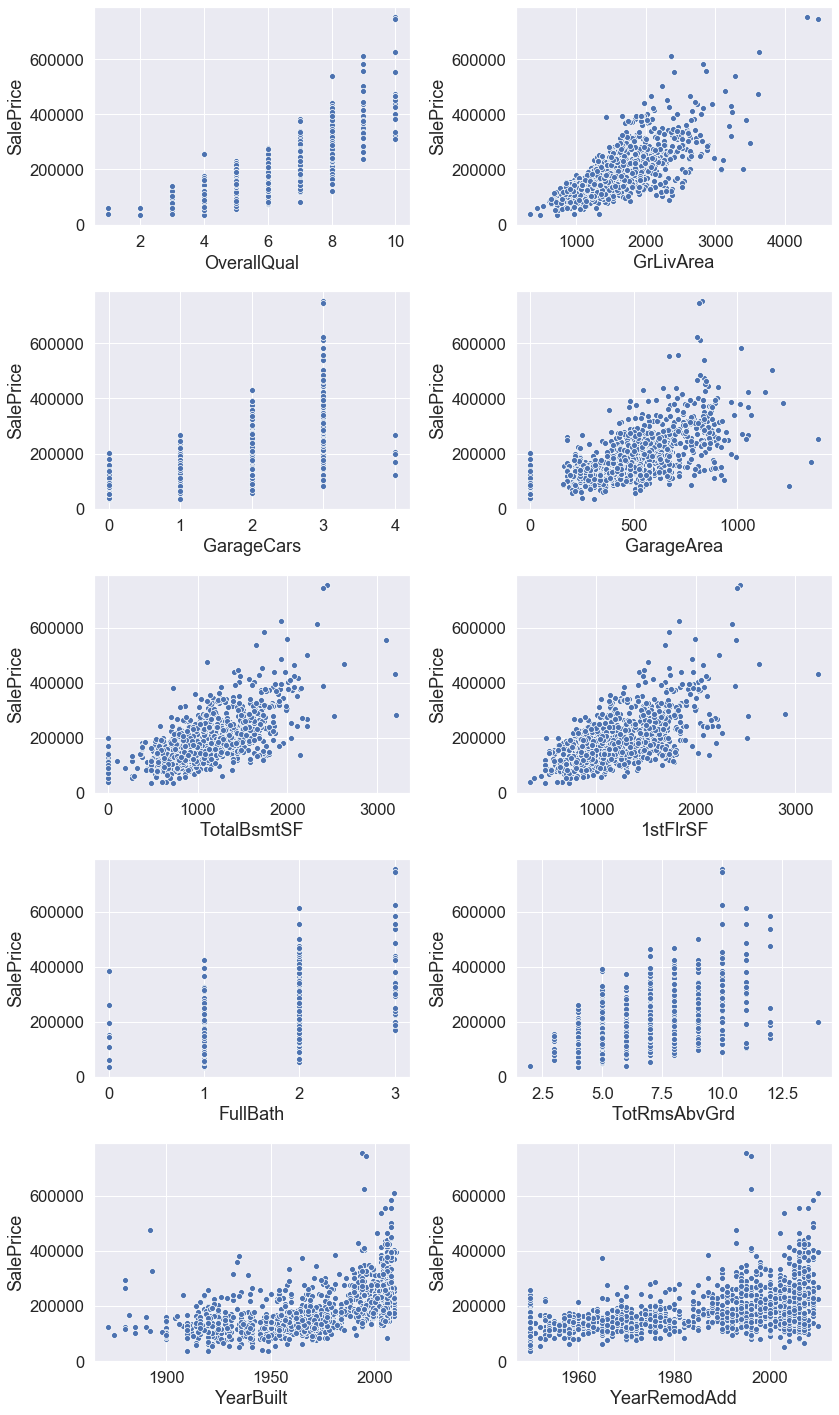

In [8]:
fig, ax = plt.subplots(5,2, figsize=(12,20))

# Flatten ax from (5,2) to (10,0)
ax = ax.ravel()

# Plot each feature (names found in cols[1:])
for i in range(10):
    sns.scatterplot(train[cols[i+1]], train['SalePrice'], ax=ax[i])
    
plt.tight_layout()

    It seems the outliers in GrLivArea and TotalBsmtSF have been removed!
## Separate target variable from the training data and drop the Id column
Call the target variable "labels".

In [9]:
# Add sale price to labels and extract the ids
labels = train['SalePrice'].astype(int)
train_ids = train['Id']
test_ids = test['Id']

# Drop the ids and sale prce from the train and test sets
train = train.drop(labels=['Id', 'SalePrice'], axis=1)
test = test.drop(labels='Id', axis=1)

## Combine the training and testing data
Makes it easier to clean the data instead of working on each separately.

In [10]:
# Get number of rows in train and test
ntrain = train.shape[0]
ntest = test.shape[0]

# Combine data
train_test = pd.concat(objs=(train, test)).reset_index(drop=True)
print(f'Train + test data shape: {train_test.shape}')

# Retrieve train and test data
#train = train_test[:ntrain]
#test = train_test[ntrain:]

Train + test data shape: (2917, 79)


## Investigating total & percentage of null values in the data
Do we transform or drop/omit variables with null values?

### Visualize null values

In [11]:
def percent_NA(data):
    """
    Returns a pandas dataframe denoting the total number of NA values and the percentage of NA values in each column.
    The column names are noted on the index.
    
    Parameters
    ----------
    data: dataframe
    """
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()

    # instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA

missing_data = percent_NA(train_test)
print(f'There are {missing_data.shape[0]} features with missing values.\nNull values in the training and testing data:')
missing_data

There are 34 features with missing values.
Null values in the training and testing data:


,Number of NA,Percent NA
PoolQC,2908,99.69
MiscFeature,2812,96.40
Alley,2719,93.21
Fence,2346,80.43
FireplaceQu,1420,48.68
LotFrontage,486,16.66
GarageCond,159,5.45
GarageQual,159,5.45
GarageYrBlt,159,5.45
GarageFinish,159,5.45


## Address null values
The null values above will be cleaned in order based on count.

[Cleaning guide](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)

In [12]:
def clean_null(data):
    # Fill each NA value with 'None'. I.e. a NA in PoolQC specifies that there's no pool
    data['PoolQC'] = data['PoolQC'].fillna('None')
    data['MiscFeature'] = data['MiscFeature'].fillna('None')
    data['Alley'] = data['Alley'].fillna('None')
    data['Fence'] = data['Fence'].fillna('None')
    data['FireplaceQu'] = data['FireplaceQu'].fillna('None')
    
    # Group by neighborhoods and compute each of their median lot frontage values. Use these median values to fill in the NAs
    data['LotFrontage'] = data.groupby(by="Neighborhood")['LotFrontage'].transform( lambda x: x.fillna(x.median()) )
    
    # Fill NA values in these garage features with 'None'
    for col in ('GarageCond', 'GarageQual', 'GarageFinish', 'GarageType'):
        data[col] = data[col].fillna('None')
    
    # Fill NA values in these garage features with 0
    for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        data[col] = data[col].fillna(0)
    
    # Fill NA with 0
    for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
        data[col] = data[col].fillna(0)
    
    # Fill NA with 'None'
    for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        data[col] = data[col].fillna('None')
        
    # NA values means no veneers
    data["MasVnrType"] = data["MasVnrType"].fillna("None")
    data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

    # Most of the values are RL, so fill in the NA values with that
    data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])

    # Only 2 missing values, we can safely drop
    data = data.drop(['Utilities'], axis=1)
    
    # Can be filled with Typical
    data["Functional"] = data["Functional"].fillna("Typ")
    
    # Most of the values are 'SBrkr'
    data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])
    
    # Most values are 'TA'
    data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])

    # There's very few NA values, so fill with most common string
    data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
    data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
    data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])

    # NA value here means there's no subclass for the house
    data['MSSubClass'] = data['MSSubClass'].fillna("None")
    
    return data

train_test = clean_null(train_test)

## Check to see if there's any null values

In [13]:
missing_data = percent_NA(train_test)
missing_data

,Number of NA,Percent NA


    Looks like there are no more null values!

## Convert some variables to categorical and label encode
> 1. MSSubClass
> 2. OverallCond
> 3. YrSold
> 4. MoSold

Label encoding is used on categorical variables when there is a logical ordering.

In [14]:
def clean_cat(data):
    # Convert to categorical variable
    data['MSSubClass'] = data['MSSubClass'].apply(str)
    data['OverallCond'] = data['OverallCond'].astype(str)
    data['YrSold'] = data['YrSold'].astype(str)
    data['MoSold'] = data['MoSold'].astype(str)
    
    # Use LabelEncoder to encode variables.
    columns = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
    
    for col in columns:
        le = LabelEncoder()
        data[col] = le.fit_transform( list(data[col].values) )
    
    return data

train_test = clean_cat(train_test)
train_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,RL,65.0,8450,1,1,3,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,2,4,PConc,2,4,3,2,706.0,6,0.0,150.0,856.0,GasA,0,1,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,3,Attchd,2003.0,2,2.0,548.0,5,5,2,0,61,0,0,0,0,3,4,None,0,4,2,WD,Normal
1,5,RL,80.0,9600,1,1,3,Lvl,FR2,0,Veenker,Feedr,Norm,1Fam,1Story,6,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,4,CBlock,2,4,1,0,978.0,6,0.0,284.0,1262.0,GasA,0,1,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,5,Attchd,1976.0,2,2.0,460.0,5,5,2,298,0,0,0,0,0,3,4,None,0,7,1,WD,Normal
2,10,RL,68.0,11250,1,1,0,Lvl,Inside,0,CollgCr,Norm,Norm,1Fam,2Story,7,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,2,4,PConc,2,4,2,2,486.0,6,0.0,434.0,920.0,GasA,0,1,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,5,Attchd,2001.0,2,2.0,608.0,5,5,2,0,42,0,0,0,0,3,4,None,0,11,2,WD,Normal
3,11,RL,60.0,9550,1,1,0,Lvl,Corner,0,Crawfor,Norm,Norm,1Fam,2Story,7,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,4,BrkTil,4,1,3,0,216.0,6,0.0,540.0,756.0,GasA,2,1,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,Detchd,1998.0,3,3.0,642.0,5,5,2,0,35,272,0,0,0,3,4,None,0,4,0,WD,Abnorml
4,10,RL,84.0,14260,1,1,0,Lvl,FR2,0,NoRidge,Norm,Norm,1Fam,2Story,8,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,2,4,PConc,2,4,0,2,655.0,6,0.0,490.0,1145.0,GasA,0,1,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,5,Attchd,2000.0,2,3.0,836.0,5,5,2,192,84,0,0,0,0,3,4,None,0,3,2,WD,Normal


## For the other categorical variables, use one-hot encoding
This is generally done to categorical variables that have no inherent ordering. The downside is that it increases the number of features by a lot (may overfit).

In [15]:
train_test = pd.get_dummies(train_test)
train_test.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,10,65.0,8450,1,1,3,0,7,4,2003,2003,196.0,2,4,2,4,3,2,706.0,6,0.0,150.0,856.0,0,1,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,3,2003.0,2,2.0,548.0,5,5,2,0,61,0,0,0,0,3,4,0,4,2,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,5,80.0,9600,1,1,3,0,6,7,1976,1976,0.0,3,4,2,4,1,

# 3. Feature Engineering
## Create a feature that is the sum of above ground and basement area

In [16]:
train_test['TotalSF'] = train_test['TotalBsmtSF'] + train_test['1stFlrSF'] + train_test['2ndFlrSF']

# 4. XGBoost Model

## Load training data and labels

In [17]:
# Retrieve train and test data
train = train_test[:ntrain]
test = train_test[ntrain:]

## Rescale values to be 0-1
It seems that rescaling the values when using XGBoost (regression) makes the predictions a lot worse. Don't use!

In [18]:
# Instantiate MinMaxScaler
#scaler = preprocessing.MinMaxScaler()

# Rescale X_train & X_test
#train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
#test = pd.DataFrame(scaler.fit_transform(test), columns=test.columns)

#train.head()

In [19]:
# Store data and labels
X = train
y = labels

## Tuning hyperparameters
Use GridSearchCV to find the best hyperparameters to use in the model.

In [66]:
# thanks to: https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0
def xgb_param_selection(X, y, nfolds):
    """
    Prints the best hyperparameters to use for the classifier. Please edit the estimator and parameters
    to suit your needs.
    ----------
    X: X_train
    y: y_train
    nfolds: Number of folds to use in cross validation
    """    
    # Define hyperparameter values to go through
    #reg_alphas = [0, 1e-5, 1e-2, 0.1, 1, 100]
    reg_alphas = [1e-5, 1e-2, 0.1, 1]
    #reg_lambdas = [0, 1e-5, 1e-2, 0.1, 1, 100]
    reg_lambdas = [1e-5, 1e-2, 0.1, 1]
    #min_child_weights = [1, 2, 3]
    min_child_weights = [3, 4, 5]
    learning_rates = [0.1]
    #max_depths = [2, 3, 4]
    max_depths = [4, 5, 6]
    #subsamples = [0.5, 0.75, 1]
    subsamples = [0.75]
    
    # Store hyperparameters in dictionary
    param_grid = {'reg_alpha': reg_alphas,
                  'reg_lambda' : reg_lambdas,
                  'min_child_weight': min_child_weights,
                  'learning_rate': learning_rates,
                  'max_depth': max_depths,
                  'subsample': subsamples}
    
    # Run GridSearchCV & fit. Change the estimator from svm to another if needed
    grid_search = GridSearchCV(xgb.XGBRegressor(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    
    # Return best 
    return grid_search.best_params_

# Run GridSearchCV with 7 folds cross validation using XGBoost as the estimator. Uncomment below to run the search. Roughly leaves 0.1428 in the testing sets
#xgb_param_selection(X, y, 7)

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 4,
 'reg_alpha': 0.01,
 'reg_lambda': 0.1,
 'subsample': 0.75}

In [20]:
# Train/test split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=3)  

# XGBoost model
xgb_reg = xgb.XGBRegressor(learning_rate=0.1, max_depth=4, min_child_weight=4, reg_alpha=0.01,
                           reg_lambda=0.1, subsample=0.75)

# Fit model
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=4, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.01, reg_lambda=0.1, scale_pos_weight=1, seed=None,
             silent=True, subsample=0.75)

In [21]:
# make predictions
y_pred_xgb = xgb_reg.predict(X_valid)
predictions = [round(value) for value in y_pred_xgb]

prediction_xgb_df = pd.DataFrame( {'Actual': y_valid, 'Predicted': y_pred_xgb} )
predictions = prediction_xgb_df['Predicted']

prediction_xgb_df.head(10)

,Actual,Predicted
140,115000,105820.851562
950,129000,141913.093750
248,180000,189318.031250
738,179000,142899.015625
569,135960,139098.734375
1325,55000,56250.660156
1083,160000,149029.562500
784,128000,127575.125000
1336,135000,135814.609375
1407,112000,118983.695312


[0.00712378 0.02938557 0.05788068 0.         0.         0.01068566
 0.00267142 0.03739982 0.02671416 0.03650935 0.03116652 0.0160285
 0.00801425 0.         0.00712378 0.00089047 0.00979519 0.00712378
 0.04897596 0.00356189 0.00445236 0.04986643 0.03650935 0.00445236
 0.00534283 0.02315227 0.01869991 0.00089047 0.04897596 0.00712378
 0.         0.0062333  0.00356189 0.00712378 0.00356189 0.01068566
 0.00534283 0.01246661 0.00801425 0.00445236 0.01869991 0.00445236
 0.00890472 0.03650935 0.00089047 0.00089047 0.00178094 0.02404274
 0.01691897 0.00445236 0.00267142 0.00801425 0.         0.
 0.00356189 0.         0.02048085 0.01157614 0.00534283 0.00356189
 0.00089047 0.00178094 0.00534283 0.00178094 0.         0.00089047
 0.00178094 0.00089047 0.00445236 0.00267142 0.         0.00089047
 0.         0.         0.         0.00267142 0.00267142 0.00178094
 0.0160285  0.00356189 0.         0.         0.         0.
 0.00178094 0.         0.         0.00445236 0.00267142 0.00178094
 0.00089047 

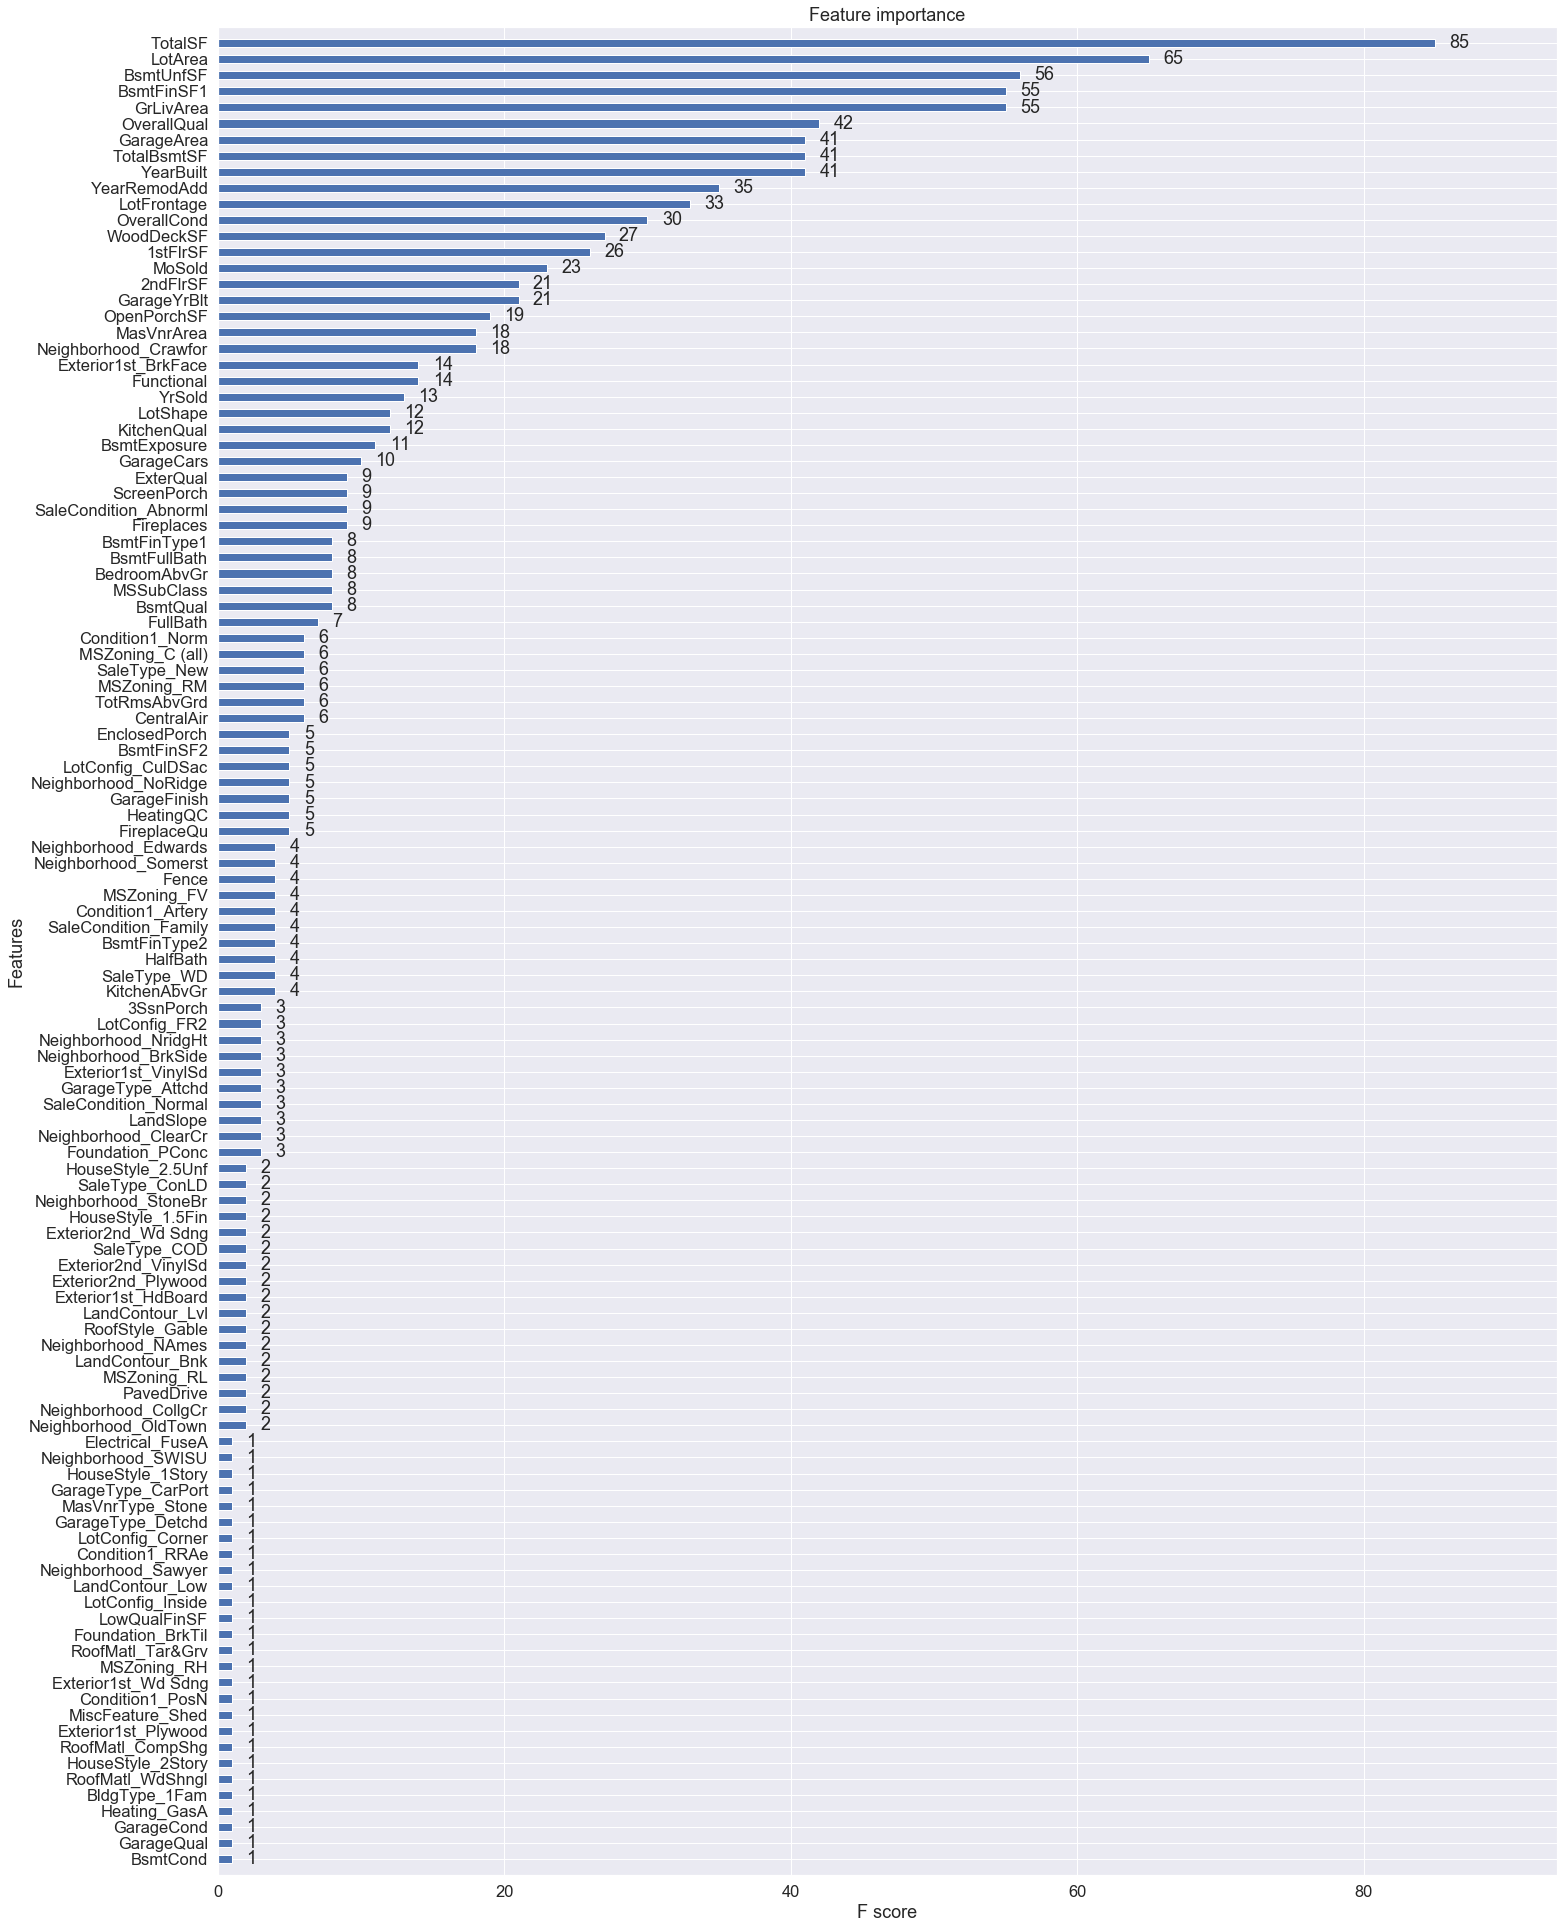

In [22]:
print(xgb_reg.feature_importances_)
fig, ax = plt.subplots(figsize=(24,34))
xgb.plot_importance(xgb_reg, height=0.5, ax=ax)

In [23]:
# Percent error
percent_error = (((predictions - y_valid)/(y_valid)) * 100).mean()
percent_error_std = (((predictions - y_valid)/(y_valid)) * 100).std()
print('Percent error:', round(percent_error, 2), '%', '(%f)' % round(percent_error_std, 2))

Percent error: 0.63 % (12.200000)


In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))

actual_mean = prediction_xgb_df['Actual'].mean()
percent_of_mean_value = round((np.sqrt(metrics.mean_squared_error(y_valid, predictions)) / actual_mean)*100, 2)
print( '\n% of mean value:', percent_of_mean_value)

Mean Absolute Error: 14213.913188498858
Mean Squared Error: 529461835.5316503
Root Mean Squared Error: 23010.037712521254

% of mean value: 13.05


## XGBoost model prediction on the testing data
Housing prices will be predicted for the testing set.

In [38]:
# Top features (with F score >=4) from the feature importance graph above
features = ['TotalSF', 'LotArea', 'BsmtUnfSF', 'BsmtFinSF1',
            'GrLivArea', 'OverallQual', 'GarageArea', 'TotalBsmtSF',
            'YearBuilt', 'YearRemodAdd', 'LotFrontage', 'OverallCond',
            'WoodDeckSF', '1stFlrSF', 'MoSold', '2ndFlrSF',
            'GarageYrBlt', 'OpenPorchSF', 'MasVnrArea', 'Neighborhood_Crawfor',
            'Exterior1st_BrkFace', 'Functional', 'YrSold', 'LotShape',
            'KitchenQual', 'BsmtExposure', 'GarageCars', 'ExterQual',
            'ScreenPorch', 'SaleCondition_Abnorml', 'Fireplaces', 'BsmtFinType1',
            'BsmtFullBath', 'BedroomAbvGr', 'MSSubClass', 'BsmtQual',
            'FullBath', 'Condition1_Norm', 'MSZoning_C (all)', 'SaleType_New',
            'MSZoning_RM', 'TotRmsAbvGrd', 'CentralAir', 'EnclosedPorch',
            'BsmtFinSF2', 'LotConfig_CulDSac', 'Neighborhood_NoRidge', 'GarageFinish',
            'HeatingQC', 'FireplaceQu', 'Neighborhood_Edwards', 'Neighborhood_Somerst',
            'Fence', 'MSZoning_FV', 'Condition1_Artery', 'SaleCondition_Family',
            'BsmtFinType2', 'HalfBath', 'SaleType_WD', 'KitchenAbvGr']

print(f'Number of training features: {X.shape[1]}.\nNumber of training features (truncated): {X[features].shape[1]}')

Number of training features: 220.
Number of training features (truncated): 60


    The idea of truncating the number of features was to tackle the curse of dimensionality. The dimensionality constant is calculated by dividing the number of features by the number of rows in the data. Many algorithms perform best when having a constant near 0.
> Constant for 220 features = 0.15

> Constant for 60 features = 0.04

    Decided not to truncate the features from 220 to 60 features since this actually made the prediction errors larger on the testing set. This could be due to how XGBoost handles features. Algos that use a similar system to a random forest do well with a lot of features.

In [30]:
# fit xgboost model
xgb_reg = xgb.XGBRegressor(learning_rate=0.1, max_depth=4, min_child_weight=4, reg_alpha=0.01,
                           reg_lambda=0.1, subsample=0.75)
xgb_reg.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=4, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.01, reg_lambda=0.1, scale_pos_weight=1, seed=None,
             silent=True, subsample=0.75)

In [31]:
# make predictions
y_pred_xgb = xgb_reg.predict(test)
predictions = [round(value) for value in y_pred_xgb]

In [32]:
# Place into kaggle test format
final_predictions = pd.DataFrame( {'Id': range(1461, 1461 + len(predictions)), 'SalePrice': predictions} )
final_predictions = final_predictions.set_index(keys=['Id'], drop=True)
final_predictions.head()

,SalePrice
Id,
1461,127370.0
1462,168167.0
1463,191887.0
1464,190526.0
1465,189404.0


In [33]:
# save as csv file
final_predictions.to_csv(filepath + 'test_submission.csv')

# Next time:
[Serigne](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard) has a really interesting way to transform sale price and other features to have less kurtosis. Please see!

Also, look into narrowing down the features by taking the features that have larger f-scores (xgb feature importance) and building/tuning the model after that.